In [1]:
from pymeeus.Epoch import Epoch
from pymeeus.Earth import Earth
from pymeeus.Jupiter import Jupiter
from pymeeus.JupiterMoons import JupiterMoons
from pymeeus.Sun import Sun

import numpy as np
import matplotlib.pyplot as plt

from numpy import cos as cos
from numpy import sin as sin
from numpy import tan as tan
from numpy import arccos as arccos
from numpy import arcsin as arcsin
from numpy import arctan2 as arctan2

In [2]:
epoch = Epoch()
epoch.set(2020, 1, 3, 12, 50, 59)
time_step = 1.157401129603386e-05 * 60

In [3]:
epsilon = 1/15.4  #flatness ratio of jupiter on the equator

R = 71492 #equatorial radius of Jupiter in km

au_j_r = 149597870700/R

f = 0.06487

rho = f/(1-f)
print("Flatness ratio at the equator (diameter) : " + str(rho))

Flatness ratio at the equator (diameter) : 0.06937003411290409


In [17]:
alpha = 2*rho +rho**2

l, b, D = Jupiter.geometric_heliocentric_position(epoch)

#convert from ecliptical spherical to ecliptical cartesian coordinates
x_j = D * cos(b.rad()) * cos(l.rad()) * au_j_r
y_j = D * cos(b.rad()) * sin(l.rad()) * au_j_r
z_j = D * sin(b.rad()) * au_j_r

r_p = (np.array([x_j, y_j, z_j])).T
    
r_p = r_p.reshape(3,1)
print("Jupiter's position in AU")
print(r_p)

#jupiter's axial tilt
omega = np.deg2rad(3.13)

p_hat = np.array([0,0,1]).T @ np.array([[1,0,0],[0,cos(omega),-sin(omega)],[0, sin(omega), cos(omega)]])

p_hat = np.squeeze(p_hat.reshape(3,1))

print("p_hat :")
print(p_hat)

x_hat = np.squeeze(r_p/(D*au_j_r))

y_hat = np.cross(x_hat, p_hat)/np.linalg.norm(np.cross(x_hat, p_hat))

print("y_hat : ")
print(y_hat)

z_hat = np.cross(x_hat, y_hat)

print("z_hat : ")
print(z_hat)

beta = (1+alpha)/(1+alpha*sin(np.deg2rad(omega))**2)

Jupiter's position in AU
[[  1216151.95865708]
 [-10867870.54587904]
 [    18651.14670391]]
p_hat :
[0.         0.05460164 0.99850822]
y_hat : 
[-0.99377979 -0.11119693  0.00608061]
z_hat : 
[-0.00585323 -0.00237114 -0.99998006]


In [18]:
#Satellitenkoordinaten von der Sonne aus
position_matrix = (np.array(JupiterMoons.rectangular_positions(epoch, solar = True))).reshape(4, 3)
#extract only one line-vector for a single satellite, Io will be taken as an example for the following computations

Q = position_matrix[0, :].T

print("Position of IO in Jupiter Radii")
print(Q)

Q_buffer = np.zeros([3,1])

Q_buffer = Q;

#It is necessare to rotate the coordinate-system to be working with Tulliauts method

Q = np.array([-Q_buffer[2],Q_buffer[0] ,Q_buffer[1]])

Q = Q/ au_j_r

print("Io's position in AU, Tulliauts coordinates System")
print(Q)

Position of IO in Jupiter Radii
[-4.14759229  0.15290688 -4.16860633]
Io's position in AU, Tulliauts coordinates System
[ 1.99215405e-06 -1.98211155e-06  7.30733592e-08]


In [19]:
#check weather the Method is working in a timespan of 3600 minutes --> 60h
n = 3600

x_vec = np.zeros([n,1])
y_vec = np.zeros([n,1])
z_vec = np.zeros([n,1])
d = np.zeros([n,1])
t = np.zeros([n,1])

epoch = Epoch()
epoch.set(2020, 1, 2, 12, 0, 59)

X = np.array([[0],[0],[1]])/ au_j_r
M = np.array([[1,0,0],[0,1,0],[0,0,rho]])

Q_buffer = np.zeros([3,1])
    
for i in range(0, n):

    epoch += time_step
    
    l, b, D = Jupiter.geometric_heliocentric_position(epoch)

    #convert from ecliptical spherical to ecliptical cartesian coordinates
    x_j = D * cos(b.rad()) * cos(l.rad()) * au_j_r
    y_j = D * cos(b.rad()) * sin(l.rad()) * au_j_r
    z_j = D * sin(b.rad()) * au_j_r

    r_p = (np.array([x_j, y_j, z_j])).T

    r_p = r_p.reshape(3,1)

    #jupiter's axial tilt
    omega = np.deg2rad(3.13)

    p_hat = np.array([0,0,1]).T @ np.array([[1,0,0],[0,cos(omega),-sin(omega)],[0, sin(omega), cos(omega)]])

    p_hat = np.squeeze(p_hat.reshape(3,1))

    x_hat = np.squeeze(r_p/D)

    y_hat = np.cross(x_hat, p_hat)/np.abs(np.cross(x_hat, p_hat))

    z_hat = np.cross(x_hat, y_hat)

    beta = (1+alpha)/(1+alpha*sin(np.deg2rad(omega))**2)
    
    #Satellitenkoordinaten von der Sonne aus
    position_matrix = (np.array(JupiterMoons.rectangular_positions(epoch, solar = True))).reshape(4, 3)
    #extract only one line-vector for a single satellite, Io will be taken as an example for the following computations

    Q = position_matrix[0, :].T

    Q_buffer = np.zeros([3,1])

    Q_buffer = Q;

    #It is necessare to rotate the coordinate-system to be working with Tulliauts method

    Q = np.array([-Q_buffer[2],Q_buffer[0] ,Q_buffer[1]])

    Q = Q/ au_j_r

    x_vec[i] = -Q_buffer[2]
    
    d[i] = np.sqrt(Q[1]**2+beta*Q[2]**2)-(R/(au_j_r *D))*(Q[0] + D)
    
    if(d[i]  > 0) :
        print(epoch.get_full_date())
        print(d[i])

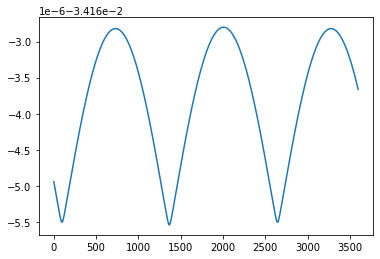

In [20]:
plt.plot(d)

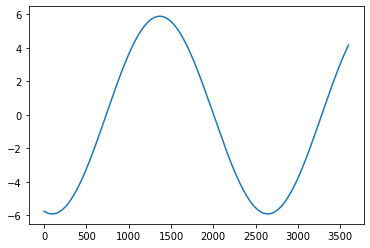

In [12]:
plt.plot(x_vec)

In [ ]:
x_hat = np.squeeze(r_p / D)

D = np.linalg.norm(r_p)

y_hat = np.squeeze(np.cross(x_hat, p_hat, axis= 0)/np.linalg.norm(np.cross(x_hat, p_hat, axis = 0)))

z_hat = np.squeeze(np.cross(x_hat, y_hat, axis = 0))

x = np.dot(r_s , x_hat) 

y = np.dot(r_s , y_hat)

z = np.dot(r_s , z_hat)

sin_omega = - np.dot(p_hat ,x_hat)

cos_omega =  np.dot(p_hat , y_hat)

print(np.rad2deg(arcsin(sin_omega)))
print(np.rad2deg(arcsin(cos_omega)))


beta = (1+alpha)/(1+alpha+sin_omega**2)

In [ ]:
d= np.sqrt(y**2 + beta* z**2) - R/D*(x+D)
print(d)